In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f = r.TFile("./data/gm2offline_ana.root")
t = f.Get("SimuTreeMaker").Get("gm2ringsimTree")

In [3]:
t.Print()

******************************************************************************
*Tree    :gm2ringsimTree: gm2ringsimTree                                         *
*Entries :    92000 : Total =        54908301 bytes  File  Size =   24675891 *
*        :          : Tree compression factor =   2.22                       *
******************************************************************************
*Br    0 :runNum    : runNum/I                                               *
*Entries :    92000 : Total  Size=     369545 bytes  File Size  =       3276 *
*Baskets :       12 : Basket Size=      32000 bytes  Compression= 112.64     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/I                                            *
*Entries :    92000 : Total  Size=     369593 bytes  File Size  =       3372 *
*Baskets :       12 : Basket Size=      32000 bytes  Compression= 109.44     *
*...............................................

In [28]:
histVec = []
meanThetaVec = []
for calo in range(1,25):
    h = r.TH1D("h","Calo "+str(calo)+ " Theta; Theta [rad]; N",600,0,2*r.TMath.Pi())
    t.Draw("eCaloTheta[0]>>h","eCaloNum == "+str(calo)+" && eCaloFlag == 0","goff")
    f1 = r.TF1("f1","gaus",0,2*r.TMath.Pi())
    f1.SetNpx(1000)
    f1.SetParameters(1,h.GetMean(), 0.01)
    h.Fit("f1","REMB")
    caloiMean = f1.GetParameter(1)
    caloiSTD = f1.GetParameter(2)
    
    meanThetaVec.append( (caloiMean, caloiSTD) )
    histVec.append(h.Clone("h_"+str(calo)))

 FCN=69.2968 FROM MIGRAD    STATUS=CALL LIMIT   1352 CALLS        1353 TOTAL
                     EDM=0.0211471    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  62.3 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.10087e+07   4.24812e+06   1.37718e+04  -9.45866e-08
   2  Mean         1.12728e-01   5.50101e-03  -6.77654e-05  -4.99220e+01
   3  Sigma        2.17478e-02   9.39403e-04   1.89110e-05  -1.06158e+02
 FCN=87.4614 FROM MIGRAD    STATUS=CALL LIMIT   1352 CALLS        1353 TOTAL
                     EDM=0.0545677    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  17.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.37071e+06   2.55854e+06   3.91537e+05  -1.85694e-06
   2  Mean         3.87043e-01   4.59926e-03  -4.05495e-04  -2.44560e+03
   3  Sigma

Warning in <Fit>: Abnormal termination of minimization.
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <Fit>: Abnormal termination of minimization.
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <Fit>: Abnormal termination of minimization.
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <Fit>: Abnormal termination of minimization.
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <Fit>: Abnormal termination of minimization.
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <Fit>: Abnormal termination of minimization.
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <Fit>: Abnormal termination of minimization.
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <Fit>: Abnormal termination of minimization.

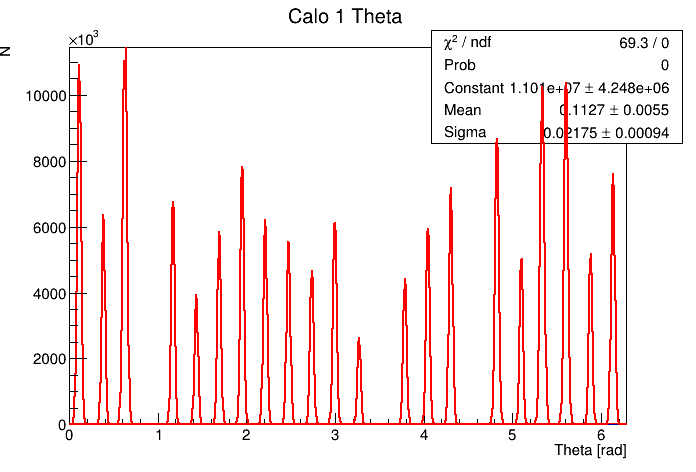

In [29]:
c = r.TCanvas()
for i, h in enumerate(histVec):
    if(i == 0):
        h.Draw()
    else:
        h.Draw("SAME")
c.Draw()

In [30]:
for i, x in enumerate(meanThetaVec):
    print("Calo", i+1,":",x)

Calo 1 : (0.11272777572964064, 0.021747804230623766)
Calo 2 : (0.38704268778924433, 0.01936249471517193)
Calo 3 : (0.630334955791008, 0.022954593285630407)
Calo 4 : (0.9882987408784784, 0.0034400507187372226)
Calo 5 : (1.1718751132875604, 0.01942959744011565)
Calo 6 : (1.435603925064294, 0.019559576376387493)
Calo 7 : (1.6943768479695187, 0.019852931640638116)
Calo 8 : (1.9531923566210057, 0.020256364681729186)
Calo 9 : (2.2134087184367677, 0.02090389053403429)
Calo 10 : (2.475283362118464, 0.0209902523804333)
Calo 11 : (2.7397174588150497, 0.02051813390824606)
Calo 12 : (2.9979804262428855, 0.021144421104548717)
Calo 13 : (3.272053406490232, -0.019047141197452863)
Calo 14 : (3.606752905906422, 0.0029082845903131713)
Calo 15 : (3.790081889744413, 0.019881828228010903)
Calo 16 : (4.047968629057927, 0.02042371108232811)
Calo 17 : (4.3078791723918215, 0.020684545098748796)
Calo 18 : (4.654521173053848, -0.003431986024714003)
Calo 19 : (4.8274337538242085, 0.0214174505181312)
Calo 20 : (5.

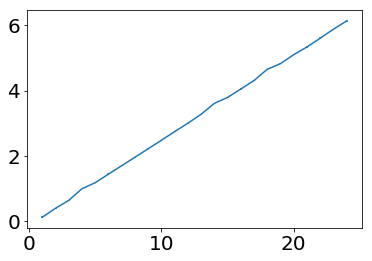

In [31]:
thetas, stds = zip(*meanThetaVec)
plt.errorbar([x for x in range(1,25)], thetas, yerr=stds)
plt.show()

In [32]:
print(thetas)

(0.11272777572964064, 0.38704268778924433, 0.630334955791008, 0.9882987408784784, 1.1718751132875604, 1.435603925064294, 1.6943768479695187, 1.9531923566210057, 2.2134087184367677, 2.475283362118464, 2.7397174588150497, 2.9979804262428855, 3.272053406490232, 3.606752905906422, 3.790081889744413, 4.047968629057927, 4.3078791723918215, 4.654521173053848, 4.8274337538242085, 5.102626352202925, 5.339031467575712, 5.607840660438622, 5.884482084626629, 6.138585371556525)
